## SHOPIFY SUMMER 2022 DATA SCIENCE INTERN CHALLENGE

#### Question 1: Given some sample data, write a program to answer the following:

#### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b. What metric would you report for this dataset?

c. What is its value?


In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
df = pd.read_csv("/Users/abhishekmathur/Downloads/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,Unnamed: 7,Unnamed: 8
0,1,53,746,224,2,cash,2017-03-13 12:36:56,NaN,NaN
1,2,92,925,90,1,cash,2017-03-03 17:38:52,NaN,NaN
2,3,44,861,144,1,cash,2017-03-14 4:23:56,NaN,NaN
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,NaN,NaN
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,NaN,NaN
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,NaN,NaN
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,NaN,NaN
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,NaN,15725640.0


In [195]:
df.drop("Unnamed: 7", axis='columns',inplace = True)

In [196]:
df.drop("Unnamed: 8", axis='columns',inplace = True)

In [197]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


## Performing EDA (Exploratory Data Analysis)


In [198]:
df.describe()  # It gives the summary

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [199]:
df.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

In [200]:
df.isna()   

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


<AxesSubplot:>

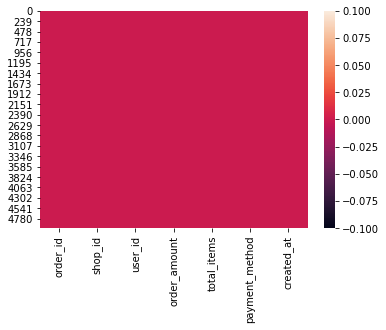

In [201]:
sns.heatmap(df.isnull())

In [202]:
df2 = df.isnull().sum().to_frame()
df2.columns = ["total_null_values"]
df2                                     

,total_null_values
order_id,0
shop_id,0
user_id,0
order_amount,0
total_items,0
payment_method,0
created_at,0


Therefore, there are no null values in any column

In [203]:
df.order_amount.mean()

3145.128

In [204]:
# df.groupby(df["shop_id" == 78])["order_amount"].replace(df.order_amount,(df.order_amount/100))
# df.groupby(df["shop_id" == 78])["order_amount"].transform(lambda x: x/100))

### Price of one order

In [205]:
df["price_of_one_order"] = df["order_amount"] / df["total_items"]
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_of_one_order
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


### Average price of one order

In [206]:
df["price_of_one_order"].mean()

387.7428

#### Average "price_of_one_order" is looking high, therefore we are now checking which shop has the inconsistency in the "price_of_one_order"

In [207]:
df.groupby(df['shop_id'])['price_of_one_order'].mean().reset_index().sort_values(by=['price_of_one_order'],ascending = False)

,shop_id,price_of_one_order
77,78,25725.0
41,42,352.0
11,12,201.0
88,89,196.0
98,99,195.0
...,...,...
52,53,112.0
99,100,111.0
31,32,101.0
1,2,94.0


This shows that shop 78 is selling at a higher price

In [208]:
df[df["shop_id"] != 78]["price_of_one_order"].mean()     #Average price of one order after removing shop 78

152.47557529269278

#### Now, shoes are looking affordable in 99 stores (~$152 per shoe) 

### Calculating Average Order Value (AOV)

Text(0, 0.5, 'No. of orders')

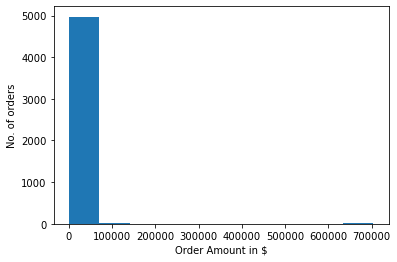

In [212]:
plt.hist(df['order_amount'])
plt.xlabel('Order Amount in $')
plt.ylabel('No. of orders')

It depicts that there is a high discrepancy in the order amount, hence as we have seen above that shop 78 is the issue so we'll drop it in the end

In [213]:
df["total_items"].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

It shows that 2000 items/order are sold 17 times

#### Which store is selling 2000 items/ order?

In [214]:
df[df["total_items"] == 2000]["shop_id"].unique()

array([42])

Is Shop 42 selling at high amount to everyone or Is there any customer wanted that much amount of items?

In [215]:
df[df['shop_id'] == 42].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_of_one_order
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,352.0


In [216]:
df[df['user_id'] == 607].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_of_one_order
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0


It shows that user 607 is demanding huge amount of items each time

We will get a better data to get AOV by 2 ways:
1. if we remove the shop 42 and 78
2. if we remove shop 78 and customer 607

#### 1. Removing shop 42 and shop 78 data

In [217]:
df_new = df[(df["shop_id"] != 42) & (df["shop_id"] != 78)]

In [218]:
df_new["total_items"].mean()

1.9957169080155006

In [219]:
df_new["order_amount"].mean()   # New AOV

300.1558229655313

#### 2. Removing shop 78 and customer 607 data

In [220]:
df_new2 = df[(df["shop_id"] != 78) & (df["user_id"] != 607)]
df_new2.isnull().sum()

order_id              0
shop_id               0
user_id               0
order_amount          0
total_items           0
payment_method        0
created_at            0
price_of_one_order    0
dtype: int64

In [221]:
df_new2["order_amount"].mean()   # New AOV

302.58051448247926

AOV from step 2 (i.e. $302.58) is more accurate as we have more data in this step to calculate AOV

### Using different metrics to report the dataset

In [222]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Standard deviation is very high because of the anomalies in the dataset.
Hence, calculating z-score

In [228]:
df["z_score"] = (df["order_amount"] - 3145.128) / 41282.539349
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_of_one_order,z_score
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0,-0.070759
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0,-0.074005
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0,-0.072697
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0,-0.072407
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0,-0.072407
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0,-0.068192
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0,-0.070517
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0,-0.067683
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0,-0.067610


In [231]:
df1 = df[df['z_score'] > 0.2].head()
df1

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_of_one_order,z_score
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0,16.977029
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0,16.977029
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0,0.546959
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0,1.170104
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0,1.170104


In [232]:
df1[df1['z_score'] > 0.2]['shop_id'].unique()

array([42, 78])

Shop 78 and 42 have anomalies as they are far from the mean as compared to others.

### Hence, AOV from step 2 is $ 302.58

#### Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a. How many orders were shipped by Speedy Express in total?

b. What is the last name of the employee with the most orders?

c. What product was ordered the most by customers in Germany?


#### Answer a.   54

SELECT S.ShipperName, COUNT(S.ShipperName) AS TotalCount

FROM Shippers AS S INNER JOIN Orders AS O

ON O.ShipperID = S.ShipperID

WHERE S.ShipperName = "Speedy Express"

#### Answer b. Peacock 

SELECT LastName, COUNT(*) AS Total_Orders

FROM Employee_Orders   

GROUP BY LastName  

ORDER BY 2 desc

LIMIT 1;

#### Answer c.    Boston Crab Meat

SELECT Customers.Country, Products.ProductName, SUM(OrderDetails.Quantity) AS Total_Orders

FROM Customers, Products, OrderDetails, Orders              

WHERE Customers.Country = "Germany" AND OrderDetails.OrderID = Orders.OrderID AND OrderDetails.ProductID = Products.ProductID AND Customers.CustomerID = Orders.CustomerID

GROUP BY Products.ProductName

ORDER BY 3 desc

LIMIT 1;